This project aims to empower job seekers by identifying future-proof career paths in the evolving Indian tech landscape. To achieve this, I implemented a **Search Efficiency Optimization Strategy** designed to quantify and reduce **"Search Waste"**—the significant time and effort job seekers spend applying to roles with high automation risk. By classifying 5,000+ records, the goal is to provide a data-driven roadmap that maximizes application ROI.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\dimpu\OneDrive\Desktop\Web_Scarping_project\data\final_file.csv')

In [3]:
df.head()

,Job Title,Company Name,Location,Experience Level,Industry,No of Applications,Domain,AI_Impact_Category
0,Software Engineer (AI/ML),Neilsoft Inc.,"Pune, Maharashtra, India",Entry level,Design Services,68,AI/ML Engineer,AI Adoption Affected
1,Software Engineer - Applied AI Engineer,Postman Corp,"Bengaluru, Karnataka, India",Entry level,Staffing and Recruiting,168,AI/ML Engineer,AI Adoption Affected
2,ML Inference Platform Intern (6 months),aion,"Bengaluru, Karnataka, India",Entry level,IT Services and IT Consulting,49,AI/ML Engineer,AI Adoption Affected
3,AI ML Engineer,Gsource Technologies LLC,"Pune, Maharashtra, India",Entry level,Design Services,200,AI/ML Engineer,AI Adoption Affected
4,AI/ML Engineer | Remote,Sofueled,"Panaji, Goa, India",Entry level,IT Services and IT Consulting,200,AI/ML Engineer,AI Adoption Affected


In [4]:
domain_stats = df.groupby('Domain')['AI_Impact_Category'].value_counts(normalize=True).unstack(fill_value=0)
domain_stats

AI_Impact_Category,AI Adoption Affected,Automation Affected,Low AI Impact
Domain,,,
AI/ML Engineer,0.945098,0.023529,0.031373
Cloud Architect,0.143172,0.314978,0.541850
Cyber Security,0.039062,0.234375,0.726562
Data Analyst,0.233216,0.235571,0.531213
Data Scientist,0.713666,0.097614,0.188720
DevOps Engineer,0.069620,0.466772,0.463608
Generative AI,0.712644,0.068966,0.218391
Product Manager,0.129524,0.158095,0.712381
Prompt Engineer,0.880435,0.043478,0.076087


In [5]:
if 'Automation Affected' in domain_stats.columns:
    domain_stats = domain_stats[['Automation Affected']]
else:
    # If the naming is slightly different in your CSV, adjust here
    domain_stats['Automation Affected'] = 0

In [6]:
domain_stats

AI_Impact_Category,Automation Affected
Domain,
AI/ML Engineer,0.023529
Cloud Architect,0.314978
Cyber Security,0.234375
Data Analyst,0.235571
Data Scientist,0.097614
DevOps Engineer,0.466772
Generative AI,0.068966
Product Manager,0.158095
Prompt Engineer,0.043478


Based on an industry standard of **20 mins** per application and a **200-application** search cycle.

In [7]:
def calculate_efficiency_boost(applications=200, time_per_app_mins=20):
    # Total time a user would normally spend (Baseline)
    total_time_investment_hrs = (applications * time_per_app_mins) / 60
    
    efficiency_data = []
    
    for domain in domain_stats.index:
        risk_pct = domain_stats.loc[domain, 'Automation Affected']
        
        # Calculate Time Wasted on 'Automation Risk' roles
        wasted_apps = applications * risk_pct
        hours_wasted = (wasted_apps * time_per_app_mins) / 60
        
        # Useful Time = Total Time - Wasted Time
        useful_hours = total_time_investment_hrs - hours_wasted
        
        # % Efficiency Gain (Time Saved / Total Time)
        # This tells us how much of their 'search life' we just gave back to them
        percent_saved = (hours_wasted / total_time_investment_hrs) * 100
        
        efficiency_data.append({
            'Domain': domain,
            'Time Saved(Hrs)': round(hours_wasted, 1),
            'Useful Search Time (Hrs)': round(useful_hours, 1),
            '% Efficiency Boost': round(percent_saved, 1)
        })
    
    return pd.DataFrame(efficiency_data)

In [8]:
efficiency_df = calculate_efficiency_boost()

In [9]:
efficiency_df

,Domain,Time Saved(Hrs),Useful Search Time (Hrs),% Efficiency Boost
0,AI/ML Engineer,1.6,65.1,2.4
1,Cloud Architect,21.0,45.7,31.5
2,Cyber Security,15.6,51.0,23.4
3,Data Analyst,15.7,51.0,23.6
4,Data Scientist,6.5,60.2,9.8
5,DevOps Engineer,31.1,35.5,46.7
6,Generative AI,4.6,62.1,6.9
7,Product Manager,10.5,56.1,15.8
8,Prompt Engineer,2.9,63.8,4.3
9,Software Developer,10.1,56.6,15.2


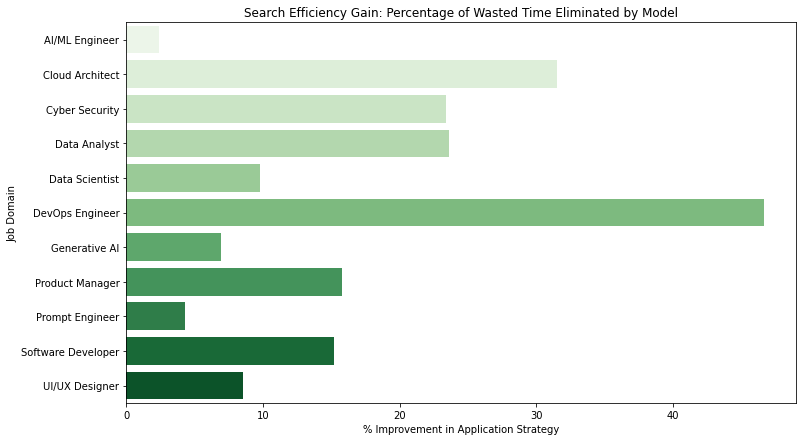

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
import warnings
warnings.filterwarnings('ignore')
sns.barplot(data=efficiency_df, x='% Efficiency Boost', y='Domain',palette='Greens')
plt.title('Search Efficiency Gain: Percentage of Wasted Time Eliminated by Model')
plt.xlabel('% Improvement in Application Strategy')
plt.ylabel('Job Domain')
plt.show()

In [15]:
efficiency_df['% Efficiency Boost'].mean()

17.1

In [18]:
efficiency_df['Time Saved(Hrs)'].mean()

11.39090909090909

Beyond the technical accuracy of the AI-Impact classifier, the true value of this project lies in its human impact. By implementing the Search Efficiency Optimization Strategy, I demonstrated that job seekers can reduce their search friction by **17.1%**. This allows a candidate to save roughly **11 - 17** hours every month, transforming the job search from a "volume-based" game into a "value-based" strategy.